##**Perceptron Trick**

[1.30829056 0.18629336]
1.0


(-3.0, 2.0)

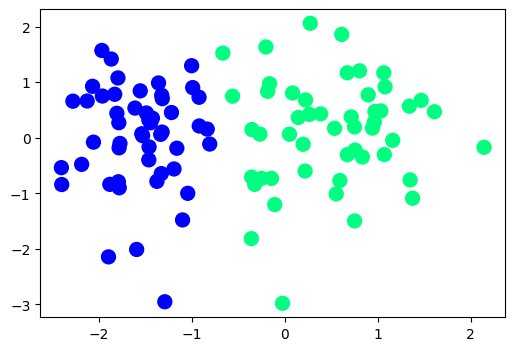

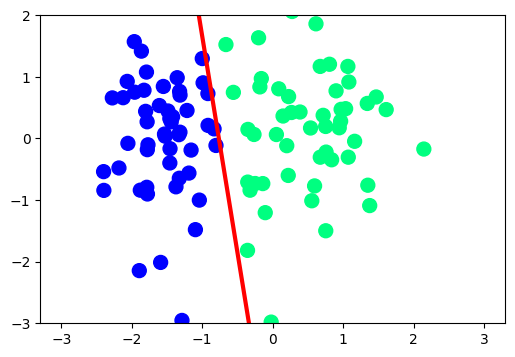

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

def step(z):
    return 1 if z > 0 else 0

def perceptron(X, y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0], weights[1:]

intercept_, coef_ = perceptron(X, y)


print(coef_)
print(intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(6,4))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

##**Perceptron Trick (Optimized)**

Converged at epoch 2
Intercept: 0.2
Coefficients: [0.27594296 0.01727671]


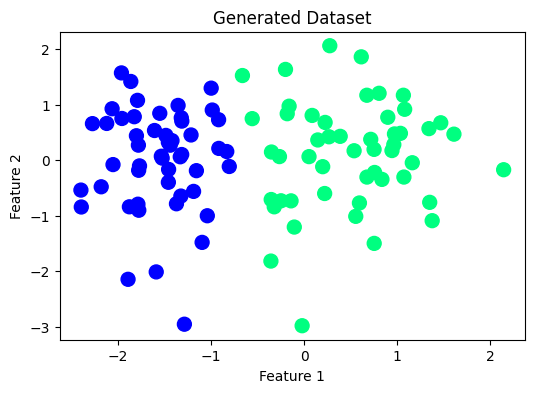

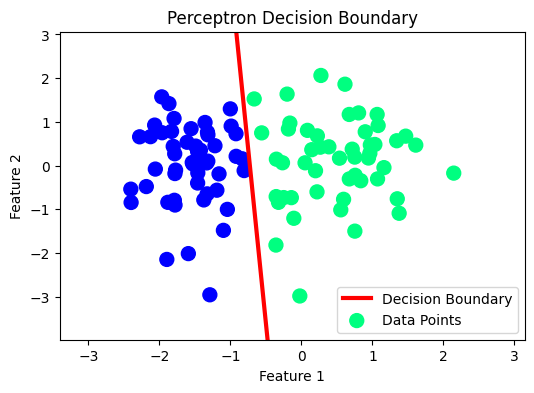

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

# Step activation function
def step(z):
    return 1 if z > 0 else 0

# Perceptron training function
def perceptron(X, y, lr=0.1, max_iter=1000, tol=1e-3):
    # Add bias term (x0 = 1) to the input data
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])  # Initialize weights to 0
    n_samples = X.shape[0]

    for epoch in range(max_iter):
        total_error = 0
        for i in range(n_samples):
            # Compute the linear combination
            z = np.dot(X[i], weights)
            # Apply step function to get the predicted label
            y_hat = step(z)
            # Update weights (Perceptron learning rule)
            error = y[i] - y_hat
            weights += lr * error * X[i]  # Weight update rule
            total_error += abs(error)

        # If total error is below the threshold, stop early (convergence check)
        if total_error < tol:
            print(f"Converged at epoch {epoch + 1}")
            break

    return weights

# Train the Perceptron
weights = perceptron(X, y)

# Extract intercept (bias) and coefficients (weights)
intercept_ = weights[0]
coef_ = weights[1:]

# Print coefficients and intercept
print(f"Intercept: {intercept_}")
print(f"Coefficients: {coef_}")

# Visualize the data points
plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Compute the decision boundary (line equation: y = mx + b)
m = -coef_[0] / coef_[1]  # slope
b = -intercept_ / coef_[1]  # y-intercept

# Generate x values for decision boundary line
x_input = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_input = m * x_input + b

# Visualize the decision boundary and dataset
plt.figure(figsize=(6, 4))
plt.plot(x_input, y_input, color='red', linewidth=3, label='Decision Boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100, label='Data Points')
plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.show()